In [31]:
import pandas as pd

train_data = pd.read_csv("data\main\df_train_b1.csv", index_col=0)
test_data = pd.read_csv('data\main\df_test_b1.csv', index_col=0)

In [32]:
import os
filenames = ["data\detail\df_basic_b1.csv",
             "data\detail\df_corp_b1.csv",
             "data\detail\df_judicial_b1.csv",
             "data\detail\df_loan2_b1.csv",
             "data\detail\df_query_b1.csv"
             ]
for filename in filenames:
    temp = pd.read_csv(filename)
    train_data = pd.merge(train_data, temp, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, temp, on="cust_id",
                         how="left", suffixes=("", "_y"))

In [33]:

temp_df = pd.read_csv("./data/detail/df_loan1_b1.csv")

def chuli_loan(df, colname, ways):
    cust_id = list(range(len(set(df['cust_id']))))
    res_df = pd.DataFrame({'cust_id': cust_id})
    
    if 'mean' in ways:
        res_df[colname+'_mean'] = df.groupby('cust_id')[colname].mean()
    if 'sum' in ways:
        res_df[colname+'_sum'] = df.groupby('cust_id')[colname].sum()
    if 'count' in ways:
        res_df[colname+'_count'] = df.groupby('cust_id')[colname].count()
    if 'std' in ways:
        res_df[colname+'_std'] = df.groupby('cust_id')[colname].std()
    if 'min' in ways:
        res_df[colname+'_min'] = df.groupby('cust_id')[colname].min()
    if 'diff_std' in ways:
        res_df[colname+'_diff_std'] = df.groupby('cust_id')[colname].apply(
            lambda x: x.sort_values(ascending=True).diff()[2:].std())
    return res_df

for colname in ['loan1_2', 'loan1_3', 'loan1_7', 'loan1_9']:
    df = chuli_loan(temp_df, colname, ('sum',))
    train_data = pd.merge(train_data, df, on="cust_id",
                            how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, df, on="cust_id",
                            how="left", suffixes=("", "_y"))

In [34]:
full_col_name = list(train_data.columns)
basic_col = [i for i in full_col_name if "basic" in i]
loan_col = [i for i in full_col_name if "loan" in i]
overdue_col = [i for i in full_col_name if "overdue" in i]
query_col = [i for i in full_col_name if "query" in i]
judicial_col = [i for i in full_col_name if "judicial" in i]
date_col = [i for i in full_col_name if "date" in i]

x_col = basic_col+['is_judicial']+loan_col+query_col+overdue_col
x_col = [i for i in x_col if i in full_col_name]

train_data=train_data[x_col+['label']]
test_data=test_data[x_col]

In [35]:
print('自变量个数为', len(x_col))
print(x_col)

自变量个数为 118
['basic_1', 'basic_2', 'basic_3', 'basic_4', 'basic_5', 'basic_6', 'basic_7', 'basic_8', 'basic_9', 'basic_10', 'basic_11', 'basic_12', 'basic_13', 'basic_14', 'basic_15', 'basic_1_y', 'basic_2_y', 'basic_3_y', 'loan1_1', 'loan1_2', 'loan1_3', 'loan1_4', 'loan1_5', 'loan1_6', 'loan1_7', 'loan1_8', 'loan1_9', 'loan1_10', 'loan1_11', 'loan1_12', 'loan1_13', 'loan1_14', 'loan1_15', 'loan1_16', 'loan1_17', 'loan1_18', 'loan1_19', 'loan1_20', 'loan1_21', 'loan1_22', 'loan1_23', 'loan1_24', 'loan1_25', 'loan1_26', 'loan1_27', 'loan1_28', 'loan1_29', 'loan1_30', 'loan1_31', 'loan1_32', 'loan1_33', 'loan2_1', 'loan2_2', 'loan2_3', 'loan2_4', 'loan2_5', 'loan2_6', 'loan2_7', 'loan2_8', 'loan2_9', 'loan2_10', 'loan2_11', 'loan2_12', 'loan2_1_y', 'loan2_2_y', 'loan2_3_y', 'loan2_4_y', 'loan2_5_y', 'loan1_2_sum', 'loan1_3_sum', 'loan1_7_sum', 'loan1_9_sum', 'query_1', 'query_2', 'query_3', 'query_4', 'query_5', 'query_6', 'query_7', 'query_8', 'query_9', 'query_10', 'query_11', 'query_1

In [36]:
from sklearn import model_selection

train_data,local_test_data=model_selection.train_test_split(train_data,test_size=3000,stratify=train_data['label'])

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(14999, 118)","(14999,)",None,None,None,binary(2)


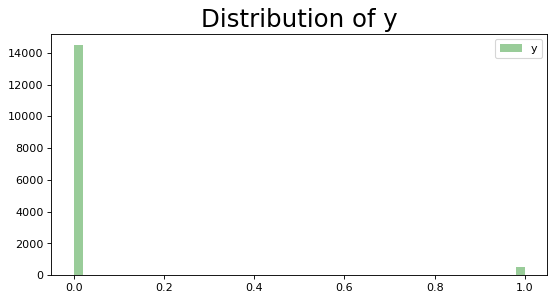

## Data Adaption

### Initliazed parameters

,key,value
0,memory_limit,0.05
1,min_cols,0.3
2,name,data_adaption
3,target,None


### Fitted parameters

,key,value
0,input_features,"[basic_1, basic_2, basic_3, basic_4, basic_5, ..."
1,selected_features,"[basic_1, basic_2, basic_3, basic_4, basic_5, ..."
2,unselected_features,[]


### Elapsed

* 0.009 seconds

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[basic_1, basic_2, basic_3, basic_4, basic_5, ..."
1,selected_features,"[basic_1, basic_2, basic_3, basic_4, basic_5, ..."
2,unselected_features,"[basic_8, basic_9, basic_11, basic_15]"
3,X_train.shape,"(14999, 114)"
4,y_train.shape,"(14999,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,"{'basic_8': 'constant', 'basic_9': 'constant',..."
9,kept/dropped feature count,114/4


### Elapsed

* 0.280 seconds

## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Experiment Settings:

HyperGBM(searcher=EvolutionSearcher(space_fn=GeneralSearchSpaceGenerator(kwargs=None, n_estimators=200), population_size=30, sample_size=10, regularized=True, optimize_direction='max', random_state=RandomState(MT19937) at 0x249BFB4BA40), callbacks=[EarlyStoppingCallback(max_no_improvement_trials=10, mode='max', time_limit=3599.710000038147), NotebookCallback(), ProgressiveCallback(), FitCrossValidationCallback()], reward_metric='auc', task='binary', discriminator=OncePercentileDiscriminator(percentile=50, history=TrialHistory(direction='max'), optimize_direction='max'))

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(14999, 114)","(14999,)",None,None,True,3,100,()


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,18,0.499321,9,0.733998,80.590849,19,100


#### Best Trial:

key,value
signature,a870c9f2ecc5d7bac42a8b303c059784
vectors,"[0, 2, 3, 2, 350, 0, 3, 4, 3]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,constant
2-numeric_or_scaler_0.hp_or,3
3-Module_LightGBMEstimator_1.boosting_type,goss
4-Module_LightGBMEstimator_1.num_leaves,350
5-Module_LightGBMEstimator_1.max_depth,3
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,0.733998,2.137211,"[0, 2, 3, 2, 350, 0, 3, 4, 3]"
1,15,0.710714,3.796817,"[0, 2, 4, 2, 115, 1, 1, 2, 1]"
2,14,0.701729,7.979061,"[0, 0, 5, 2, 105, 3, 1, 2, 1]"
3,7,0.692969,1.628482,"[0, 2, 4, 2, 270, 0, 2, 3, 3]"
4,8,0.684040,2.405401,"[2, 2, 0, 2, 2, 2]"


search:   0%|          | 0/100 [00:00<?, ?it/s]

fit_cross_validation:   0%|          | 0/3 [00:00<?, ?it/s]

### Fitted parameters

,key,value
0,input_features,"[basic_1, basic_2, basic_3, basic_4, basic_5, ..."
1,best_reward,0.733998
2,history,"TrialHistory(direction='max', size=19, succeed..."


### Elapsed

* 80.656 seconds

## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(roc_auc_score, needs_proba=True, m..."


### Fitted parameters

,0,1
0,weights,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.999122724558333, 0.999122724558333, 0.99912..."
2,best_stack,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
3,hits,{2: 20}
4,ensemble_size,20


### Elapsed

* 2.495 seconds

In [37]:
from hypergbm import make_experiment

experiment = make_experiment(train_data, target='label', reward_metric='auc',max_trials=100,cv=True)
estimator = experiment.run()

In [38]:
from sklearn.metrics import roc_auc_score

X_local_test=local_test_data[x_col]
Y_local_test=local_test_data['label']

X_local_test2,X_local_test1,Y_local_test2,Y_local_test1=model_selection.train_test_split(X_local_test,Y_local_test,test_size=1000,stratify=Y_local_test)
X_local_test3,X_local_test2,Y_local_test3,Y_local_test2=model_selection.train_test_split(X_local_test2,Y_local_test2,test_size=1000,stratify=Y_local_test2)

pred1=estimator.predict_proba(X_local_test1)[:,1]
pred2=estimator.predict_proba(X_local_test2)[:,1]
pred3=estimator.predict_proba(X_local_test3)[:,1]

print(roc_auc_score(Y_local_test1,pred1))
print(roc_auc_score(Y_local_test2,pred2))
print(roc_auc_score(Y_local_test3,pred3))

0.6637742053343076
0.7178784557301181
0.7249421507733528
